In [92]:
# webscraping 환경 준비
from urllib.request import urlopen
from urllib import parse
from bs4 import BeautifulSoup as bs

# 예외처리
from urllib.error import HTTPError
from urllib.error import URLError

# 데이터 처리
import re
import pandas as pd
import numpy as np
from datetime import datetime

# webscraping간에 지연시간 주기
import time

# 자연어 처리를 위한
import sys
import csv

maxInt = sys.maxsize
# maxInt # 9223372036854775807
# pd.read_csv()로 읽을 경우 field size값이 너무 커서 에러발생
# csv.field_size_limit(maxInt)
csv.field_size_limit(92233720)
import jpype
import konlpy
from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
import nltk

t = Twitter()
kkma = Kkma()
# mecab = Mecab() # Mecab은 윈도우에서 사용 불가
hannanum = Hannanum()

# Mecab은 윈도우에서 사용불가이기 때문에 eunjeon라이브러리를 사용
from eunjeon import Mecab
mecab = Mecab()

# 경고문
import warnings
warnings.filterwarnings('ignore')

In [88]:
what_now = '''
네이버 뉴스에서 랄라블라 검색
조건
정렬 : 미지정(관련도순?)
기간 : 2016-01-01 ~ 2018-12-31
?? : 제목
유형 : 전체
언론사 : 미지정(전체?)
기자명 : 미지정(전체?)

주소창 url
https://search.naver.com/search.naver?where=news&query=%EB%9E%84%EB%9D%BC%EB%B8%94%EB%9D%BC
&sm=tab_srt
&sort=0
&photo=0
&field=1
&reporter_article=
&pd=3
&ds=2016.01.01
&de=2018.12.31
&docid=
&nso=so%3Ar%2Cp%3Afrom20160101to20181231%2Ca%3At
&mynews=0
&refresh_start=0
&related=0
'''

In [3]:
# 뉴스 사이트에서 제목 긁어오기

# 검색어
search_obj = '랄라블라'
# 구글 뉴스에서
google_url = 'https://news.google.com/search?q='+parse.quote(search_obj)+'&hl=ko&gl=KR&ceid=KR%3Ako'
html = urlopen(google_url)
obj = bs(html, 'html.parser')

In [91]:
# titles = obj.select('body > c-wiz > div > div > div > div > main > c-wiz > div > div > div > article > h3')
titles = obj.select('div.xrnccd > article > h3 > a')
# index = 1
# for title in titles:
#     string_title = title.text
#     href = title.attrs.get('href').replace('./articles','https://news.google.com/articles')
#     print(index,'\t::',title.string)
#     print(href)
#     index += 1

In [94]:
# csv로 저장
title_list = list()
link_list = list()
today = datetime.today().strftime("%Y-%m-%d")

for title in titles:
    title_list.append(title.text)
    link_list.append(title.attrs.get('href').replace('./articles','https://news.google.com/articles'))
# print(title_list[-1])
# print(link_list[-1])
title_link = pd.DataFrame()
title_link['title'] = title_list
title_link['link'] = link_list
title_link['date'] = today
title_link = title_link.iloc[:,[2,0,1]]
# title_link.tail()
# title_link.to_csv('D:/project/contest/data/textmining/구글_랄라블라_'+today+'.csv', index=False, encoding='UTF-8')

## 데이터 불러오기

In [124]:
today = datetime.today().strftime("%Y-%m-%d")
title_link = pd.read_csv('D:/project/contest/data/textmining/구글_랄라블라_'+today+'.csv')

### 한번에 처리하기전 하드코딩

In [123]:
ts = time.time()
html = urlopen(news_links[0])  
obj = bs(html, 'html.parser')

text_working = obj.select('div > a')
print(text_working[-1].text)

te = time.time()
took = te-ts
print(took,'초') # 2.12308335

http://biz.chosun.com/site/data/html_dir/2019/06/22/2019062200743.html
2.1230833530426025 초


In [122]:
ts = time.time()
html = urlopen(news_links[1])  
obj = bs(html, 'html.parser')

text_working = obj.select('div > a')
print(text_working[-1].text)

te = time.time()
took = te-ts
print(took,'초') # 1.99350595

http://www.econovill.com/news/articleView.html?idxno=366793
1.9935059547424316 초


In [119]:
# ts = time.time()
html = urlopen(news_links[2])  
obj = bs(html, 'html.parser')

text_working = obj.select('div > a')
# for t in text_working:
#     print(t.text)
print(text_working[-1].text)
# te = time.time()
# took = te-ts
# print(took,'초') # 2.1117022

http://www.kinews.net/news/articleView.html?idxno=211366
2.1117022037506104 ns


In [127]:
ts = time.time()
news_links = title_link.link
actual_links = list()
for newLink in news_links:
    html = urlopen(newLink)  
    obj = bs(html, 'html.parser')
    text_working = obj.select('div > a')
    actual_links.append(text_working[-1].text)
    if len(actual_links)%10==0:
        print(len(actual_links),'번째 뉴스링크 처리 중')
    time.sleep(2.5)
print('실제 뉴스링크 가져오기 완료')
title_link['actualLink'] = actual_links
print('실제 뉴스링크 df에 추가 완료')
te = time.time()
took = te-ts
print('%d 초 소요됨.'.format(took//1))

10 번째 뉴스링크 처리 중
20 번째 뉴스링크 처리 중
30 번째 뉴스링크 처리 중
40 번째 뉴스링크 처리 중
50 번째 뉴스링크 처리 중
60 번째 뉴스링크 처리 중
70 번째 뉴스링크 처리 중
80 번째 뉴스링크 처리 중
90 번째 뉴스링크 처리 중
100 번째 뉴스링크 처리 중
실제 뉴스링크 가져오기 완료
실제 뉴스링크 df에 추가 완료
814.6327750682831 초 소요됨.


In [130]:
title_link.to_csv('D:/project/contest/data/textmining/구글_랄라블라_'+today+'.csv',index=False, encoding='UTF-8')

In [139]:
print(title_link.actualLink[95])
print(title_link.link[95])

http://www.slist.kr/news/articleView.html?idxno=68903
https://news.google.com/articles/CBMiNWh0dHA6Ly93d3cuc2xpc3Qua3IvbmV3cy9hcnRpY2xlVmlldy5odG1sP2lkeG5vPTY4OTAz0gE2aHR0cDovL20uc2xpc3Qua3IvbmV3cy9hbXBBcnRpY2xlVmlldy5odG1sP2lkeG5vPTY4OTAz?hl=ko&gl=KR&ceid=KR%3Ako


In [140]:
lv_titles = str(title_link.title)
print(lv_titles)

0                     '롭스·랄라블라'도 적자인데...로드숍 다브랜드 전략 통할까
1                             랄라블라, 여름 맞아 '타투스티커' 인기 상승
2            어도비-GS리테일, '랄라블라' 고객에게 데이터 분석 기반 경험 서비스 제공
3                            랄라블라, 임산부 배려 캠페인으로 근무환경 개선
4                          랄라블라, KT 통신사 할인 서비스 업계 최초 도입
5                   메디픽미 '터치업 제모크림', 랄라블라 입점 기념 프로모션 진행
6                                    히든랩 #쑥싹클렌징 랄라블라 등장
7                        GS리테일 랄라블라, 어도비 애널리틱스로 고객경험 혁신
8          “2만원 결제하면 3000원 할인”...랄라블라, KT멤버쉽 연중 상시할인 도입
9                                             CEO스코어데일리
10                                     H&B스토어 6월 팔림세 분석
11                        '2조원 헬스앤뷰티 시장을 잡아라' 대기업 3사 격돌
12      편의점택배 '포스트박스퀵', GS편의점과 GS슈퍼마켓에 이어 랄라블라까지 사용처 확대
13                             韓日관계 경색 속에서도 화장품은 '무풍지대'
14                   [2019 한국서비스대상] 명예의 전당 신한생명 / GS리테일
15                         '침체의 늪' H&B스토어…매장 설계도 다시 그린다
16                            뭉쳐야 산다…`멀티숍` 도전하는 1세대 K뷰티
17                                 이마트 부진에 H&B 부

In [141]:
# Counter는 collections에 정의도니 모듈로서 특정 텍스트에 출현하는 모든 단어의 빈도수를 리턴하는
# 모듈이다.
from collections import Counter

In [143]:
counter = Counter(lv_titles)
counter
type(counter) # Dict자료형

# most_common() : 가장 많이 출현한 단어(키)를 찾는 함수
print(counter.most_common(10))
print(len(lv_titles))

[(' ', 1679), ('라', 78), ('\n', 61), ("'", 48), ('스', 38), (',', 37), ('랄', 35), ('블', 35), ('.', 26), ('1', 26)]
3455


In [144]:
counter = Counter(title_link.title)
counter

Counter({"'롭스·랄라블라'도 적자인데...로드숍 다브랜드 전략 통할까": 1,
         "랄라블라, 여름 맞아 '타투스티커' 인기 상승": 1,
         "어도비-GS리테일, '랄라블라' 고객에게 데이터 분석 기반 경험 서비스 제공": 1,
         '랄라블라, 임산부 배려 캠페인으로 근무환경 개선': 1,
         '랄라블라, KT 통신사 할인 서비스 업계 최초 도입': 1,
         "메디픽미 '터치업 제모크림', 랄라블라 입점 기념 프로모션 진행": 1,
         '히든랩 #쑥싹클렌징 랄라블라 등장': 1,
         'GS리테일 랄라블라, 어도비 애널리틱스로 고객경험 혁신': 1,
         '“2만원 결제하면 3000원 할인”...랄라블라, KT멤버쉽 연중 상시할인 도입': 1,
         'CEO스코어데일리': 1,
         'H&B스토어 6월 팔림세 분석': 1,
         "'2조원 헬스앤뷰티 시장을 잡아라' 대기업 3사 격돌": 1,
         "편의점택배 '포스트박스퀵', GS편의점과 GS슈퍼마켓에 이어 랄라블라까지 사용처 확대": 1,
         "韓日관계 경색 속에서도 화장품은 '무풍지대'": 1,
         '[2019 한국서비스대상] 명예의 전당 신한생명 / GS리테일': 1,
         "'침체의 늪' H&B스토어…매장 설계도 다시 그린다": 1,
         '뭉쳐야 산다…`멀티숍` 도전하는 1세대 K뷰티': 1,
         '이마트 부진에 H&B 부츠도 `주춤`': 1,
         '화장품 뷰티 전문 미디어 코스인코리아닷컴': 1,
         "후기가 인증한 바이애콤, '시카데이션 선착순 무료 증정 이벤트' 성황리 종료": 1,
         '[게시판] GS리테일, 푸드뱅크에 9천만원 상당 라면 기부': 1,
         '독립운동가 스티커 캠페인… 전국 현충시설 안내… 보훈처와 손잡고 역사 알리기 앞장

In [146]:
print(counter.most_common(10))
print(len(title_link.title))

[("'롭스·랄라블라'도 적자인데...로드숍 다브랜드 전략 통할까", 1), ("랄라블라, 여름 맞아 '타투스티커' 인기 상승", 1), ("어도비-GS리테일, '랄라블라' 고객에게 데이터 분석 기반 경험 서비스 제공", 1), ('랄라블라, 임산부 배려 캠페인으로 근무환경 개선', 1), ('랄라블라, KT 통신사 할인 서비스 업계 최초 도입', 1), ("메디픽미 '터치업 제모크림', 랄라블라 입점 기념 프로모션 진행", 1), ('히든랩 #쑥싹클렌징 랄라블라 등장', 1), ('GS리테일 랄라블라, 어도비 애널리틱스로 고객경험 혁신', 1), ('“2만원 결제하면 3000원 할인”...랄라블라, KT멤버쉽 연중 상시할인 도입', 1), ('CEO스코어데일리', 1)]
100


In [147]:
lv_titles_kkma = kkma.sentences(lv_titles)
print(len(lv_titles_kkma))
lv_titles_kkma

3


["0 ' 롭스· 랄 라 블라' 도 적자인데... 로드 숍 다 브랜드 전략 통할까 1 랄 라 블라, 여름 맞아 ' 타 투 스티커' 인기 상승 2 어도비 -GS 리 테일, ' 랄 라 블라' 고객에게 데이터 분석 기반 경험 서비스 제공 3 랄 라 블라, 임산부 배려 캠페인으로 근무환경 개선 4 랄 라 블라, KT 통신사 할인 서비스 업계 최초 도입 5 메디 픽 미 ' 터치 업 제모 크림', 랄 라 블라 입 점 기념 프로 모션 진행 6 히든 랩 # 쑥 싹 클렌징 랄 라 블라 등장 7 GS 리 테일 랄 라 블라, 어도비 애 널리 틱스로 고객경험 혁신 8 “2 만원 결제하면 3000원 할인”... 랄 라 블라, KT 멤버쉽 연중 상시 할인 도입 9 CEO 스코어 데일리 10 H&B 스토어 6월 팔림세",
 '분석 11 \'2 조원 헬스 앤 뷰티 시장을 잡아 라\' 대기업 3 사 격돌 12 편의점 택배 \' 포스트 박스 퀵\', GS 편의점과 GS 슈퍼마켓에 이어 랄라블라까지 사용처 확대 13 韓日 관계 경색 속에서도 화장품은 \' 무풍지대\' 14 [2019 한국서비스대상] 명예의 전당 신한 생명 / GS 리 테일 15 \' 침체의 늪\' H&B 스토어… 매장 설계도 다시 그린다 16 뭉쳐야 산다…` 멀티 숍` 도전하는 1 세대 K 뷰티 17 이 마트 부진에 H&B 부츠도 ` 주 춤` 18 화 장품 뷰티 전문 미디어 코스 인 코리아 닷컴 19 후기가 인증한 바이 애 콤, \' 시 카 데이 션 선착순 무료 증정 이벤트\' 성황리 종료 20 [ 게시판] GS 리 테일, 푸드 뱅크에 9천만원 상당 라면 기부 21 독립운동가 스티커 캠페인… 전국 현충시설 안내… 보훈처와 손잡고 역사 알리기 앞장 22 Cosmetic Mania News) 23 " 문 신도 메이크업"… 몸에 새기지 않고 붙이는 \' 타 투 스티커\' 인기 24 \' 아 옛날이 여\' 설 곳 잃은 1 세대 화장품..." 살 길은 ODM" 25 Fashionbiz (No .1 패션 뷰티 비즈니스정보 온오프라인 매거

In [148]:
lv_titles_kkma = kkma.pos(lv_titles)
print(len(lv_titles_kkma))
lv_titles_kkma[:10]

1044


[('0', 'NR'),
 ("'", 'SS'),
 ('롭스', 'UN'),
 ('·', 'SP'),
 ('랄', 'UN'),
 ('라', 'NNG'),
 ('블라', 'NNG'),
 ("'", 'SS'),
 ('도', 'NNG'),
 ('적자', 'NNG')]

In [170]:
lv_titles_nounByHannanum = hannanum.nouns(lv_titles)
new_list = list()
for i in range(len(lv_titles_nounByHannanum)):
    working = lv_titles_nounByHannanum[i]
    working = working.replace('"',' ')
    working = working.replace("'",' ')    
    working = working.replace('…',' ')
    working = working.replace('‘',' ')
    working = working.replace('’',' ')
    working = working.replace('·',' ')
    working = working.replace('`',' ')
    working = working.replace('~',' ')
    working = working.replace('-',' ')
    working = working.replace('“',' ')
    working = working.strip(' ')
    working = working.split(' ')
    if type(working) is list:
        new_list.extend(working)
    elif type(working) is str:
        new_list.append(working)
# print(len(lv_titles_nounByHannanum))
# print(len(new_list))


436
467


In [174]:
counter = Counter(new_list)
counter.values

Counter({'0': 1,
         '롭스': 5,
         '랄라블라': 34,
         '적자': 1,
         '로드숍': 1,
         '다브랜드': 1,
         '전략': 1,
         '1': 2,
         '여름': 1,
         '타투스티커': 2,
         '인기': 2,
         '상승': 1,
         '2': 1,
         '어도비': 2,
         'GS리테일,': 3,
         '고객': 1,
         '데이터': 1,
         '분석': 2,
         '기반': 1,
         '경험': 1,
         '서비스': 2,
         '제공': 1,
         '3': 1,
         '임산부': 1,
         '배려': 1,
         '캠페인': 2,
         '근무환경': 1,
         '개선': 1,
         '4': 1,
         '통신사': 1,
         '할': 2,
         '업계': 1,
         '최초': 1,
         '도입': 3,
         '5': 2,
         '메디픽미': 1,
         '터치업': 1,
         '제모크림': 1,
         ',': 2,
         '입점': 4,
         '기념': 2,
         '프로모션': 3,
         '진행': 4,
         '6': 1,
         '히든랩': 1,
         '#쑥싹클렌징': 1,
         '등장': 1,
         '7': 1,
         'GS리테': 2,
         '애널리틱스': 1,
         '고객경험': 1,
         '혁신': 1,
         '8': 1,
         '2만원': 1

In [175]:
# 개행문자등을 제거
import re
example_sub = re.sub('\\\\n',' ',example)

NameError: name 'example' is not defined

### 워드 클라우드

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# 한글 처리
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothicCoding.ttf').get_name()
rc('font',family=font_name)

# - 마이너스 사인 처리
matplotlib.rcParams['axes.unicode_minus'] = False

In [179]:
# STOPWORDS : 불용어, 즉 불필요한 단어를 제거하는 모듈
from wordcloud import WordCloud, STOPWORDS
########################################
# custom_stopwords = ['안녕', 'article_id']
# for n in custom_stopwords:
#     STOPWORDS.add(n)
########################################
def displayWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/NanumGothicCoding.ttf',
        stopwords = STOPWORDS,
        background_color = backgroundcolor,
        width = width,
        height = height
    ).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

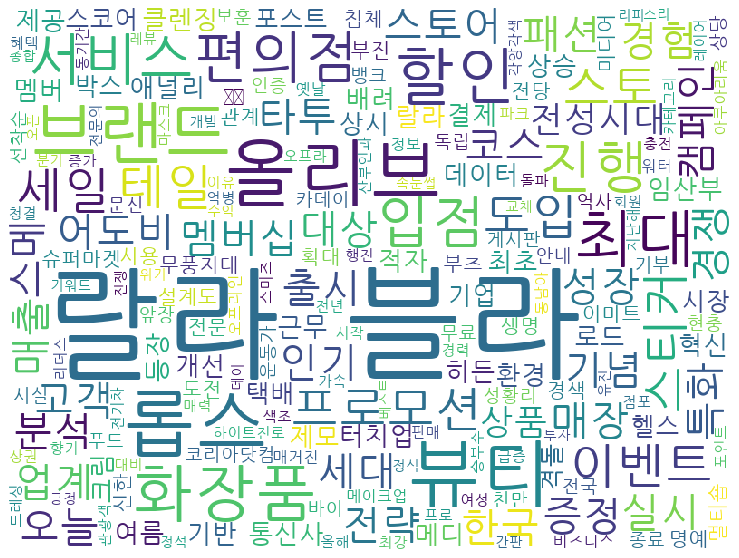

Wall time: 2.36 s


In [180]:
new_list_mecab_title = mecab.nouns(''.join(str(new_list)))
%time displayWordCloud(' '.join(new_list_mecab_title))

In [181]:
new_list_mecab_title

['롭스',
 '랄라',
 '블라',
 '적자',
 '로드',
 '숍',
 '브랜드',
 '전략',
 '랄라',
 '블라',
 '여름',
 '타투',
 '스티커',
 '인기',
 '상승',
 '어도비',
 '리',
 '테일',
 '랄라',
 '블라',
 '고객',
 '데이터',
 '분석',
 '기반',
 '경험',
 '서비스',
 '제공',
 '랄라',
 '블라',
 '임산부',
 '배려',
 '캠페인',
 '근무',
 '환경',
 '개선',
 '랄라',
 '블라',
 '통신사',
 '서비스',
 '업계',
 '최초',
 '도입',
 '메디',
 '픽',
 '미',
 '터치업',
 '제모',
 '크림',
 '랄라',
 '블라',
 '입점',
 '기념',
 '프로모션',
 '진행',
 '히든',
 '랩',
 '쑥',
 '싹',
 '클렌징',
 '랄라',
 '블라',
 '등장',
 '리',
 '테',
 '랄라',
 '블라',
 '어도비',
 '애널리',
 '고객',
 '경험',
 '혁신',
 '만',
 '원',
 '결제',
 '원',
 '할인',
 '랄라',
 '블라',
 '멤버',
 '쉽',
 '중',
 '상시',
 '할인',
 '도입',
 '스코어',
 '데',
 '리',
 '스토',
 '월',
 '팔',
 '림',
 '분석',
 '조',
 '원',
 '헬스',
 '앤',
 '뷰티',
 '시장',
 '기업',
 '사',
 '격돌',
 '편의점',
 '택배',
 '포스트',
 '박스',
 '퀵',
 '편의점',
 '슈퍼마켓',
 '랄라',
 '블라',
 '사용',
 '처',
 '확대',
 '韓日',
 '관계',
 '경색',
 '속',
 '화장품',
 '무풍지대',
 '한국',
 '서비스',
 '대상',
 '명예',
 '전당',
 '신한',
 '생명',
 '리',
 '테',
 '침체',
 '늪',
 '스토어',
 '매장',
 '설계도',
 '멀티숍',
 '도전',
 '세대',
 '뷰티',
 '이마트',
 '부진',
 '부츠',
 '화장품',
 '뷰티',
 '전문'